# กลุ่ม : Food
# หัวข้อ : อาหาร
# - นายปุณณเทพ เจริญสิทธิ์ 6509611874
# - นายปฏิพัทธ์ บุญนิล 6509611833
# - นายสิรภพ สมเชย 650961207

# IMPORT DATA AND LIBRALY

In [ ]:
pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import ConnectionPatch
import plotly.graph_objects as go

import wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/แบบสอบถามพฤติกรรมการเลือกซื้ออาหารของนักศึกษามหาวิทยาลัยธรรมศาสตร์  (Responses) - Form Responses 1.csv"
df = pd.read_csv(path)

# DATA PREPARATION

In [ ]:
df.drop(columns=['Timestamp'], inplace=True)

In [ ]:
sciData = df[df['ท่านกำลังศึกษาอยู่คณะใด'] == 'คณะวิทยาศาสตร์และเทคโนโลยี']
canteen = df[df['โดยปกติแล้วท่านซื้ออาหารจากโรงอาหารหรือไม่'] != 'ไม่ใช่']

mcanteen = canteen['โรงอาหารที่ท่านใช้บริการเป็นประจำ'].str.split(', ')
mcanteen = mcanteen.explode('โรงอาหารที่ท่านใช้บริการเป็นประจำ')
pcanteen =canteen['ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารในโรงอาหารมหาวิทยาลัย'].str.split(', ')
scicanteen = sciData['ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารในโรงอาหารมหาวิทยาลัย'].str.split(', ')
ctmeal =  canteen['ในหนึ่งวันท่านรับประทานอาหารในช่วงเวลาไหนบ้าง'].str.split(',')
outsidez = df[df['โดยปกติแล้วท่านซื้อ/สั่งอาหารจากร้านค้าภายนอกหรือไม่'] != 'ไม่ใช่']
toutside  = outsidez['ท่านซื้อ/สั่งอาหารในช่วงเวลาใดบ้าง'].str.split(',')
poutside = outsidez['ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารที่ร้านอาหารนอกมหาวิทยาลัย'].str.split(',')

makez = df[df['โดยปกติแล้วท่านทำอาหารกินเองหรือไม่'] != 'ไม่ใช่']
tmake  =makez['ท่านทำอาหารกินเองในช่วงเวลาใดบ้าง'].str.split(',')
stopwords = {}

In [ ]:
!wget -q https://github.com/Viewkup/Fonts-Storage/raw/main/Noto_Sans_Thai.zip
!unzip "Noto_Sans_Thai.zip"


Archive:  Noto_Sans_Thai.zip
  inflating: OFL.txt                 
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Thin.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-ExtraLight.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Light.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Regular.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Medium.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-SemiBold.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Bold.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-ExtraBold.ttf  
  inflating: static/NotoSansThai_ExtraCondensed/NotoSansThai_ExtraCondensed-Black.ttf  
  inflating: static/NotoSansThai_Condensed/NotoSansThai_Condensed-Thin.ttf  
  inflating: static/NotoSansThai_Condensed/NotoSans

In [ ]:
pathFornt = '/content/static/NotoSansThai/NotoSansThai-Regular.ttf'
mpl.font_manager.fontManager.addfont(pathFornt)
fontname = 'Noto Sans Thai'
mpl.rc('font',family=fontname, size=15)


# ส่วนที่ 1 ข้อมูลส่วนตัว

In [ ]:
fac = df.groupby('ท่านกำลังศึกษาอยู่คณะใด')
fac = fac.size()
print(fac)
fig = go.Figure(go.Pie(
values=fac.values,
labels=fac.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",
hole=0.3,
marker=dict(

)
))
fig.update_layout(
title={
'text': "คณะที่กำลังศึกษา   ",
'x': 0.5,
  'y': 0.5    ,
},
font_family="Noto Sans Thai",
height=800, width=2000,legend=dict(
title="คณะที่ศึกษา",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

ท่านกำลังศึกษาอยู่คณะใด
คณะนิติศาสตร์                      6
คณะพยาบาลศาสตร์                    1
คณะพาณิชยศาสตร์และการบัญชี         3
คณะรัฐศาสตร์                       3
คณะวารสารศาสตร์และสื่อสารมวลชน     4
คณะวิทยาศาสตร์และเทคโนโลยี        52
คณะวิศวกรรมศาสตร์                  4
คณะศิลปศาสตร์                     16
คณะสังคมวิทยาและมานุษยวิทยา        5
คณะสังคมสงเคราะห์ศาสตร์            1
คณะสาธารณสุขศาสตร์                 1
คณะเภสัชศาสตร์                     1
คณะเศรษฐศาสตร์                     2
คณะแพทยศาสตร์                      2
dtype: int64


In [ ]:
year= df.groupby('ชั้นปีที่กำลังศึกษาอยู่')
year = year.size()
print(year)
fig = go.Figure(go.Pie(
values=year.values,
labels=year.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",

marker=dict(

)
))
fig.update_layout(
title={
'text': "ชั้นปีที่กำลังศึกษาอยู่",
'x': 0.5
},
font_family="Noto Sans Thai",
height=400, width=1000,legend=dict(
title="ชั้นปี",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

ชั้นปีที่กำลังศึกษาอยู่
ปี 1 (รหัส 66)    22
ปี 2 (รหัส 65)    54
ปี 3 (รหัส 64)    18
ปี 4 (รหัส 63)     7
dtype: int64


In [ ]:
year= df.groupby('โปรดระบุเพศ')
year = year.size()
print(year)
fig = go.Figure(go.Pie(
values=year.values,
labels=year.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",

marker=dict(

)
))
fig.update_layout(
title={
'text': "จำนวนนักศึกษาแบ่งตามเพศ",
'x': 0.5
},
font_family="Noto Sans Thai",
height=400, width=800,legend=dict(
title="เพศ",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

โปรดระบุเพศ
ชาย                       33
หญิง                      58
เพศทางเลือก (LGBTQIA+)     9
ไม่ระบุ                    1
dtype: int64


In [ ]:
home= df.groupby('ท่านพักอยู่ที่ใด')
home= home.size()
print(home)
fig = go.Figure(go.Bar(
y=home.values,
x=home.index,
text=[f"{100*count/len(df):.2f}%" for count in home],
textposition = "inside",
marker=dict(

)
))
fig.update_traces(texttemplate = "%{y} (%{text})",textposition = "outside")
fig.update_layout(
title={
'text': "จำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์แบ่งตามที่พักอาศัย ",
'x': 0.5
},
font_family="Noto Sans Thai",
xaxis_title="ที่พัก",
yaxis_title="จำนวนนักศึกษา (คน)",
height=500, width=700
)
fig.show()

ท่านพักอยู่ที่ใด
คอนโด        5
บ้าน        11
หอพักนอก    48
หอพักใน     37
dtype: int64


In [ ]:
salary= df.groupby('รายได้ต่อเดือน')
salary= salary.size()
print(salary)
fig = go.Figure(go.Bar(
y=salary.values,
x=salary.index,
text=[f"{100*count/len(df):.2f}%" for count in salary],
textposition = "inside",
marker=dict(

)
))
fig.update_traces(texttemplate = "%{y} (%{text})",textposition = "outside")
fig.update_layout(
title={
'text': "จำนวนนักศึกษามหาวิทยาลัยธรรมศาสตร์แบ่งตามรายได้ต่อเดือน ",
'x': 0.5
},
font_family="Noto Sans Thai",
xaxis_title="รายได้ต่อเดือน",
yaxis_title="จำนวนนักศึกษา (คน)",
height=500, width=700
)
fig.show()

รายได้ต่อเดือน
12,000 - 15,000 บาท    13
6,000 - 9,000 บาท      42
9,000 - 12,000 บาท     28
ต่ำกว่า 6,000 บาท      17
มากกว่า 15,000 บาท      1
dtype: int64


In [ ]:
# แยกข้อมูลและลบช่องว่างด้านหน้าและด้านหลังของข้อมูล
tmeal = df['ในหนึ่งวันท่านรับประทานอาหารในช่วงเวลาไหนบ้าง'].str.split(',').explode().str.strip()

# รวมค่าของช่วงเวลาที่เหมือนกันเข้าด้วยกัน
tmeal_count = tmeal.value_counts()

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    y=tmeal_count.values,
    x=tmeal_count.index,
    text=[f"{100*count/len(tmeal):.2f}%" for count in tmeal_count.values],
    textposition="inside",
    marker=dict(

    )
))

# ปรับแต่งและแสดงผลกราฟ
fig.update_traces(texttemplate="%{y} (%{text})", textposition="outside")
fig.update_layout(
    title={
        'text': "ช่วงเวลาในการรับประทานอาหารของนักศึกษา ",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="ช่วงเวลาการรับประทานอาหาร",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=700
)
fig.show()


# ส่วนที่ 2 การใช้บริการโรงอาหารมหาวิทยาลัยธรรมศาสตร์

In [ ]:
usecanteen= df.groupby('โดยปกติแล้วท่านซื้ออาหารจากโรงอาหารหรือไม่')
usecanteen = usecanteen.size()
print(usecanteen)
fig = go.Figure(go.Pie(
values=usecanteen.values,
labels=usecanteen.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",

marker=dict(

)
))
fig.update_layout(
title={
'text': "จำนวนนักศึกษาแข่งตามการใช้งานโรงอาหาร",
'x': 0.5
},
font_family="Noto Sans Thai",
height=400, width=400,legend=dict(
title="ใช่หรือไม่",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

โดยปกติแล้วท่านซื้ออาหารจากโรงอาหารหรือไม่
ใช่       78
ไม่ใช่    23
dtype: int64


In [ ]:
cmeal= canteen.groupby('โดยเฉลี่ยแล้วท่านอยู่ในมหาวิทยาลัยท่านรับประทานอาหารที่โรงอาหารวันละกี่มื้อ')
cmeal = cmeal.size()
print(cmeal)
fig = go.Figure(go.Pie(
values=cmeal.values,
labels=cmeal.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",

marker=dict(

)
))
fig.update_layout(
title={
'text': "จำนวนการรับประทานอาหารในโรงอาหารต่อ 1 วัน",
'x': 0.5
},
font_family="Noto Sans Thai",
height=400, width=400,legend=dict(
title="จำนวนมื้อ",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

โดยเฉลี่ยแล้วท่านอยู่ในมหาวิทยาลัยท่านรับประทานอาหารที่โรงอาหารวันละกี่มื้อ
1 มื้อ    41
2 มื้อ    34
3 มื้อ     3
dtype: int64


In [ ]:
# แยกข้อมูลและลบช่องว่างด้านหน้าและด้านหลังของข้อมูล
mcanteen = canteen['โรงอาหารที่ท่านใช้บริการเป็นประจำ'].str.split(',').explode().str.strip()

# รวมค่าของช่วงเวลาที่เหมือนกันเข้าด้วยกัน
mcanteen_count = mcanteen.value_counts()


# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    y=mcanteen_count.values,
    x=mcanteen_count.index,
    text=[f"{100*count/len(tmeal):.2f}%" for count in mcanteen_count.values],
    textposition="inside",
    marker=dict(

    )
))

# ปรับแต่งและแสดงผลกราฟ
fig.update_traces(texttemplate="%{y} (%{text})", textposition="outside")
fig.update_layout(
    title={
        'text': "โรงอาหารที่นักศึกษาใช้บริการบ่อย ",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="โรงอารหาร",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=700
)
fig.show()

In [ ]:
pcanteen = pcanteen.explode('ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารในโรงอาหารมหาวิทยาลัย')

# นับจำนวนแต่ละคำตอบ
pcanteen_count = pcanteen.value_counts()

print(pcanteen_count)

# สร้างแผนภูมิวงกลม
fig = go.Figure(go.Pie(
    values=pcanteen_count.values,
    labels=pcanteen_count.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
))

# แสดงผลแผนภูมิวงกลม
fig.update_layout(
    title={
        'text': "ปัจจัยที่ส่งผลต่อการเลือกซื้ออาหารที่โรงอาหารมหาวิทยาลัย",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=1000, width=1200,
    legend=dict(
        title="ปัจจัย",
        orientation="h",
        yanchor="bottom",

        xanchor="center",
        x=0.5
    )
)
fig.show()

ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารในโรงอาหารมหาวิทยาลัย
รสชาติ                 64
ราคา                   59
ระยะทาง                45
ปริมาณอาหาร            33
ความคุ้มค่า            31
ความหลากหลายของเมนู    16
คุณค่าทางโภชนาการ       9
บรรยากาศ                7
ชอบ                     1
คนต่อแถวน้อย            1
Name: count, dtype: int64


In [ ]:

# แยกข้อมูลและลบช่องว่างด้านหน้าและด้านหลังของข้อมูล
ctmeal = canteen['ท่านรับประทานอาหารที่โรงอาหารในช่วงเวลาใดบ้าง'].str.split(',').explode().str.strip()

# รวมค่าของช่วงเวลาที่เหมือนกันเข้าด้วยกัน
ctmeal_count = ctmeal.value_counts()

print(ctmeal_count)

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    y=ctmeal_count.values,
    x=ctmeal_count.index,
    text=[f"{100*count/len(tmeal):.2f}%" for count in ctmeal_count.values],
    textposition="inside",
    marker=dict(

    )
))

# ปรับแต่งและแสดงผลกราฟ
fig.update_traces(texttemplate="%{y} (%{text})", textposition="outside")
fig.update_layout(
    title={
        'text': "ช่วงเวลาในการรับประทานอาหารของนักศึกษา ",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="ช่วงเวลาการรับประทานอาหาร",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=700
)
fig.show()

ท่านรับประทานอาหารที่โรงอาหารในช่วงเวลาใดบ้าง
12.00 น.- 15.00 น.     64
09.00 น. - 12.00 น.    32
18.00 น.- 21.00 น.     24
15.00 น.- 18.00 น.     17
06.00 น.- 09.00 น.      5
21.00 น.- 00.00 น.      2
Name: count, dtype: int64


In [ ]:
pre = canteen['เมนูที่ท่านเลือกซื้อเป็นประจำ'].dropna().str.split()
pre = pre.explode()
pre.iloc[2] = 'ข้าวมันไก่'
pre.iloc[9] = 'กะเพรา'
pre.iloc[17] = 'ส้มตำ'
pre.iloc[18] = 'ก๋วยเตี๋ยว'
pre.iloc[19] = 'ก๋วยเตี๋ยว'
pre.iloc[20] = 'หมูกรอบ'
pre.iloc[26] = 'ข้าวไก่ทอดแกงกะหรี่ ข้าวไก่ทอดซอสเลม่อน'
pre.iloc[30] = 'หมูกรอบ'
pre.iloc[31] = 'หมูกรอบ'

pre

1                   น้องแอม
1                        sc
2                 ข้ามันไก่
4      ไก่กรอบคั่วพริกเกลือ
6              ข้าวหน้าเป็ด
               ...         
96               ก๋วยเตี๋ยว
99               ก๋วยเตี๋ยว
99             ข้าวไข่เจียว
100        ข้าวไก่ต้มน้ำปลา
100              ข้าวราดแกง
Name: เมนูที่ท่านเลือกซื้อเป็นประจำ, Length: 114, dtype: object

In [ ]:
text_data = pre.str.cat(sep=' ')

wordcloud = WordCloud(
    font_path='/content/static/NotoSansThai/NotoSansThai-Regular.ttf',
    regexp='[0-๙]+',

    stopwords = stopwords,
    width=1200, height=600,

    prefer_horizontal=.8,
    max_words=30,

    colormap='viridis',
    background_color = 'white').generate(text_data)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
green = canteen['ร้านในโรงอาหาร Green canteen ที่ท่านใช้บริการเป็นประจำ'].dropna().str.split()
green = green.explode()

text_data = green.str.cat(sep=' ')

wordcloud = WordCloud(
    font_path='/content/static/NotoSansThai/NotoSansThai-Regular.ttf',
    regexp='[0-๙]+',

    stopwords = stopwords,
    width=1200, height=600,

    prefer_horizontal=.8,
    max_words=30,

    colormap='viridis',
    background_color = 'white').generate(text_data)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# ส่วนที่ 3 การเลือกซื้ออาหารนอกมหาวิทยาลัย

In [ ]:
outsides= df.groupby('โดยปกติแล้วท่านซื้อ/สั่งอาหารจากร้านค้าภายนอกหรือไม่')
outsides = outsides.size()
print(outsides)
fig = go.Figure(go.Pie(
values=outsides.values,
labels=outsides.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",

marker=dict(

)
))
fig.update_layout(
title={
'text': "จำนวนนักศึกษาแบ่งการใช้บริการร้านอาหารภายนอก",
'x': 0.5
},
font_family="Noto Sans Thai",
height=400, width=400,legend=dict(
title="ใช่หรือไม่",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

โดยปกติแล้วท่านซื้อ/สั่งอาหารจากร้านค้าภายนอกหรือไม่
ใช่       79
ไม่ใช่    22
dtype: int64


In [ ]:
# แยกข้อมูลและลบช่องว่างด้านหน้าและด้านหลังของข้อมูล
toutside = outsidez['ท่านซื้อ/สั่งอาหารในช่วงเวลาใดบ้าง'].str.split(',').explode().str.strip()

# รวมค่าของช่วงเวลาที่เหมือนกันเข้าด้วยกัน
toutside_count = toutside.value_counts()




print(toutside_count)

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    y=toutside_count.values,
    x=toutside_count.index,
    text=[f"{100*count/len(tmeal):.2f}%" for count in toutside_count.values],
    textposition="inside",
    marker=dict(

    )
))

# ปรับแต่งและแสดงผลกราฟ
fig.update_traces(texttemplate="%{y} (%{text})", textposition="outside")
fig.update_layout(
    title={
        'text': "ช่วงเวลาที่นักศึกษาซื้อ/สั่งอาหาร ",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="ช่วงเวลา",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=700
)
fig.show()

ท่านซื้อ/สั่งอาหารในช่วงเวลาใดบ้าง
18.00 น.- 21.00 น.     55
12.00 น.- 15.00 น.     35
15.00 น. - 18.00 น.    34
21.00 น.- 00.00 น.     27
09.00 น.- 12.00 น.     17
00.00 น.- 03.00 น.      8
06.00 น. - 09.00 น.     7
03.00 น.- 06.00 น.      1
Name: count, dtype: int64


In [ ]:
omeal= outsidez.groupby('โดยเฉลี่ยแล้วท่านซื้อ/สั่งอาหารวันละกี่มื้อ')
omeal = omeal.size()
print(omeal)
fig = go.Figure(go.Pie(
values=omeal.values,
labels=omeal.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",

marker=dict(

)
))
fig.update_layout(
title={
'text': "จำนวนการรับประทานอาหารในร้านค้านอกมหาวิทยาลัย",
'x': 0.5
},
font_family="Noto Sans Thai",
height=400, width=400,legend=dict(
title="จำนวนมื้อ",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

โดยเฉลี่ยแล้วท่านซื้อ/สั่งอาหารวันละกี่มื้อ
1 มื้อ            29
2 มื้่อ           41
3 มื้อ             7
มากกว่า 3 มื้อ     2
dtype: int64


In [ ]:
poutside = poutside.explode('ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารทีร้านอาหารนอกมหาวิทยาลัย')

# นับจำนวนแต่ละคำตอบ
poutside_count = poutside.value_counts()

print(poutside_count)

# สร้างแผนภูมิวงกลม
fig = go.Figure(go.Pie(
    values=poutside_count.values,
    labels=poutside_count.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
))

# แสดงผลแผนภูมิวงกลม
fig.update_layout(
    title={
        'text': "ปัจจัยที่ส่งผลต่อการเลือกซื้ออาหารทีร้านอาหารนอกมหาวิทยาลัย'",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=1000, width=1200,
    legend=dict(
        title="ปัจจัย",
        orientation="h",
        yanchor="bottom",

        xanchor="center",
        x=0.5
    )
)
fig.show()

ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารที่ร้านอาหารนอกมหาวิทยาลัย
ราคา                              45
 รสชาติ                           40
รสชาติ                            30
 ความหลากหลายของเมนู              28
 ปริมาณอาหาร                      28
 ระยะทาง                          28
 ความคุ้มค่า                      26
 คุณค่าทางโภชนาการ                 7
 บรรยากาศ                          5
บรรยากาศ                           1
ความหลากหลายของเมนู                1
 มีข้าว+น้ำรวมกัน จะได้ประหยัด     1
ระยะทาง                            1
 อยากกิน                           1
ความคุ้มค่า                        1
Name: count, dtype: int64


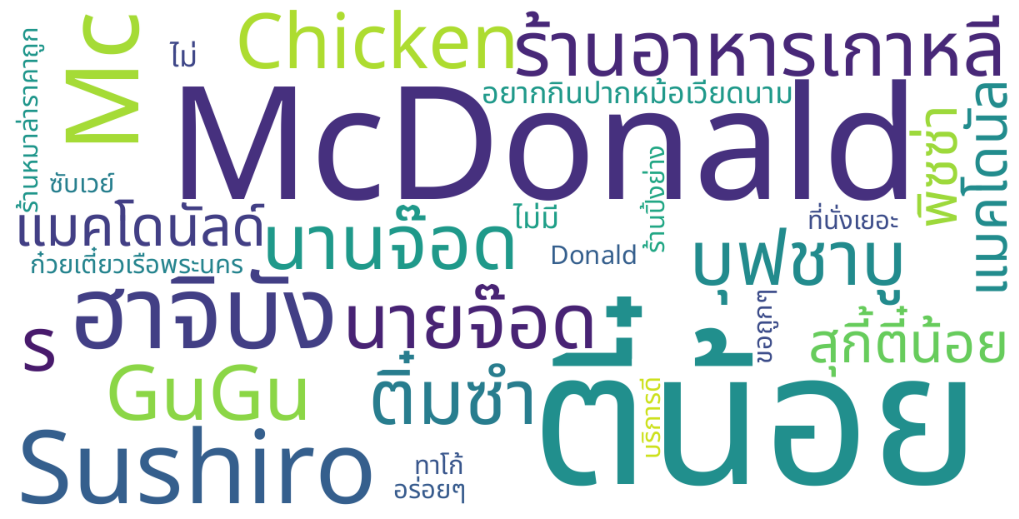

In [ ]:
shop = outsidez['อยากให้มีร้านอะไรมาเปิดในเขตมหาวิทยาลัยหรือไม่ '].dropna().str.split()
shop = shop.explode()
shop.iloc[0] = 'McDonald'
shop.iloc[8] = 'McDonald'
shop.iloc[9] = 'McDonald'
shop.iloc[10] = 'นายจ๊อด'
text_data = shop.str.cat(sep=' ')

wordcloud = WordCloud(
    font_path='/content/static/NotoSansThai/NotoSansThai-Regular.ttf',
    regexp='[0-๙]+',

    stopwords = stopwords,
    width=1200, height=600,

    prefer_horizontal=.8,
    max_words=30,

    colormap='viridis',
    background_color = 'white').generate(text_data)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
buy = outsidez['ท่านซื้อ/สั่งจากร้านค้าหรือเมนูอะไรอยู่เป็นประจำ'].dropna().str.split()
buy = buy.explode()
buy.iloc[3] = 'อาหารญี่ปุ่น'
buy.iloc[7] = 'อาหารญี่ปุ่น'
buy.iloc[8] = 'แซลม่อน'
buy.iloc[12] = 'กะเพรา'
buy.iloc[13] = 'สุกี้'
buy.iloc[14] = 'ส้มตำ'
buy.iloc[16] = 'ก๋วยเตี๋ยว'
buy.iloc[19] = 'สุกี้'

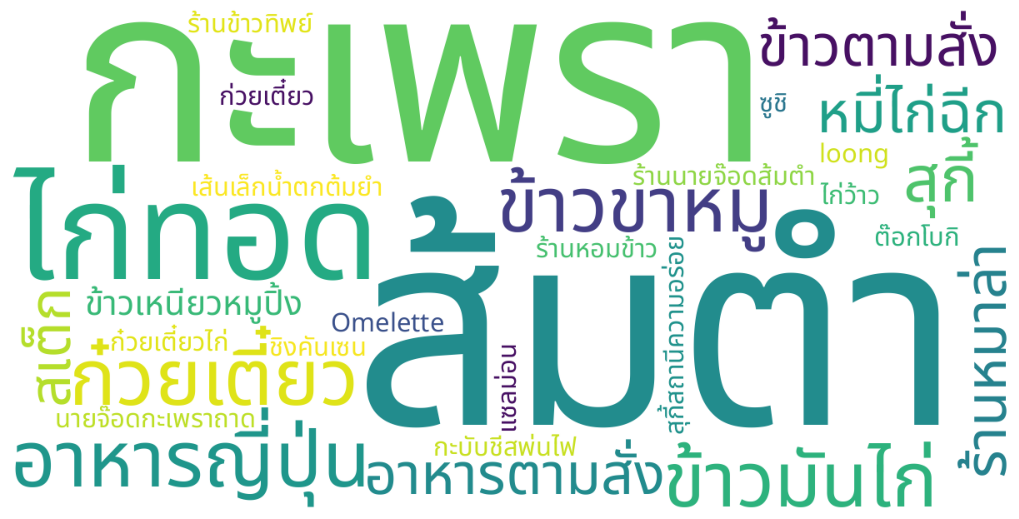

In [ ]:
text_data = buy.str.cat(sep=' ')

wordcloud = WordCloud(
    font_path='/content/static/NotoSansThai/NotoSansThai-Regular.ttf',
    regexp='[0-๙]+',

    stopwords = stopwords,
    width=1200, height=600,

    prefer_horizontal=.8,
    max_words=30,

    colormap='viridis',
    background_color = 'white').generate(text_data)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# ส่วนที่ 4 การทำอาหารรับประทานเอง

In [ ]:
make= df.groupby('โดยปกติแล้วท่านทำอาหารกินเองหรือไม่')
make = make.size()
print(make)
fig = go.Figure(go.Pie(
values=make.values,
labels=make.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",

marker=dict(

)
))
fig.update_layout(
title={
'text': "จำนวนนักศึกษาแบ่งการทำอาหารรับประทานเอง",
'x': 0.5
},
font_family="Noto Sans Thai",
height=400, width=400,legend=dict(
title="ใช่หรือไม่",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

โดยปกติแล้วท่านทำอาหารกินเองหรือไม่
ใช่       19
ไม่ใช่    82
dtype: int64


In [ ]:


# แยกข้อมูลและลบช่องว่างด้านหน้าและด้านหลังของข้อมูล
tmake = makez['ท่านซื้อ/สั่งอาหารในช่วงเวลาใดบ้าง'].str.split(',').explode().str.strip()

# รวมค่าของช่วงเวลาที่เหมือนกันเข้าด้วยกัน
tmake_count =tmake.value_counts()

print(tmake_count)

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    y=tmake_count.values,
    x=tmake_count.index,
    text=[f"{100*count/len(tmeal):.2f}%" for count in tmake_count.values],
    textposition="inside",
    marker=dict(

    )
))

# ปรับแต่งและแสดงผลกราฟ
fig.update_traces(texttemplate="%{y} (%{text})", textposition="outside")
fig.update_layout(
    title={
        'text': "ช่วงเวลาที่ทำอาหารรับประทานเอง",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    xaxis_title="ช่วงเวลา",
    yaxis_title="จำนวนนักศึกษา (คน)",
    height=500, width=700
)
fig.show()

ท่านซื้อ/สั่งอาหารในช่วงเวลาใดบ้าง
18.00 น.- 21.00 น.     10
21.00 น.- 00.00 น.      6
00.00 น.- 03.00 น.      3
12.00 น.- 15.00 น.      3
15.00 น. - 18.00 น.     3
09.00 น.- 12.00 น.      2
Name: count, dtype: int64


In [ ]:
mmeal= makez.groupby('โดยเฉลี่ยแล้วท่านทำอาหารกินเองวันละกี่มื้อ')
mmeal= mmeal.size()
print(mmeal)
fig = go.Figure(go.Pie(
values=mmeal.values,
labels=mmeal.index,
texttemplate = "%{label}: %{value} <br>(%{percent})",
textposition = "outside",

marker=dict(

)
))
fig.update_layout(
title={
'text': "จำนวนมื้อการทำอาหารรับประทานเองใน 1 วัน ",
'x': 0.5
},
font_family="Noto Sans Thai",
height=400, width=400,legend=dict(
title="จำนวนมื้อ",
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="center",
x=0.5
)
)
fig.show()

โดยเฉลี่ยแล้วท่านทำอาหารกินเองวันละกี่มื้อ
1 มื้อ            12
2 มื้่อ            6
มากกว่า 3 มื้อ     1
dtype: int64


In [ ]:
allTrouble = df['ท่านประสบพบเจอกับปัญหาใดบ้างในการทำอาหารกินเอง'].dropna().str.split()
allTrouble = allTrouble.explode()
allTrouble.iloc[0] = ' '
allTrouble.iloc[3] = ' '
allTrouble.iloc[4] = 'ล้างภาชนะเยอะ'
allTrouble.iloc[5] = ' '
allTrouble.iloc[6] = 'วัตถุดิบไม่พร้อม'
allTrouble.iloc[7] = ' '
allTrouble.iloc[8] = ' '
allTrouble.iloc[9] = 'พื้นที่ไม่เหมาะ วัตถุดิบไม่พร้อม'
allTrouble.iloc[10] = ' '
allTrouble.iloc[11] = ' '
allTrouble.iloc[12] = ' '
allTrouble.iloc[13] = ' '
allTrouble.iloc[14] = ' '
allTrouble.iloc[15] = 'การเตรียมวัตถุดิบ'
allTrouble.iloc[16] = 'ค่าใช้จ่าย การเก็บรักษา'
allTrouble.iloc[17] = ' '
allTrouble.iloc[18] = 'ล้างภาชนะเยอะ'
allTrouble.iloc[19] = ' '
allTrouble.iloc[20] = 'เครื่องมือไม่ครบ'
allTrouble.iloc[23] = 'เครื่องมือไม่ครบ'
allTrouble.iloc[25] = 'พื้นที่ไม่เหมาะ'
allTrouble.iloc[27] = 'ล้างภาชนะเยอะ'
allTrouble.iloc[28] = 'วัตถุดิบไม่พร้อม'
allTrouble.iloc[30] = 'ล้างภาชนะเยอะ'
allTrouble.iloc[31] = ' '
allTrouble.iloc[32] = 'วัตถุดิบไม่พร้อม'

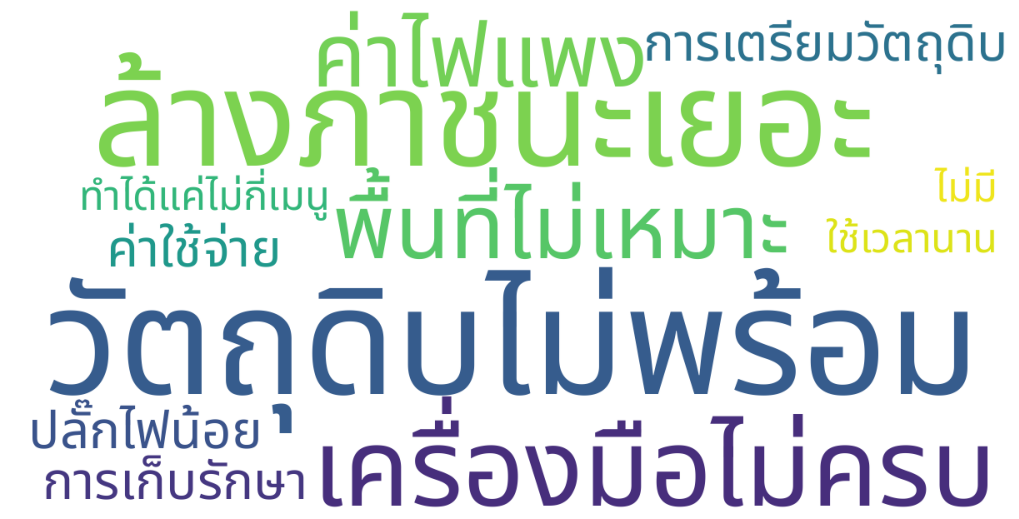

In [ ]:
text_data = allTrouble.str.cat(sep=' ')

wordcloud = WordCloud(
    font_path='/content/static/NotoSansThai/NotoSansThai-Regular.ttf',
    regexp='[0-๙]+',

    stopwords = stopwords,
    width=1200, height=600,

    prefer_horizontal=.8,
    max_words=30,

    colormap='viridis',
    background_color = 'white').generate(text_data)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
all1 = df['เมนูที่ท่านทำเป็นประจำ'].dropna().str.split()
all1 = all1.explode()
all1.iloc[4] = 'ไข่ดาว ผัดปลากระป๋อง'
all1.iloc[5] = ' '
all1.iloc[6] = ' '
all1.iloc[7] = ' '
all1.iloc[8] = 'มาม่า'
all1.iloc[11] = 'สปาเกตตี้ ข้าวต้ม ลาบ'
all1.iloc[12] = 'มาม่า'
all1.iloc[14] = 'สปาเกตตี้'
all1.iloc[16] = ' '
all1.iloc[17] = 'ไข่เจียว'

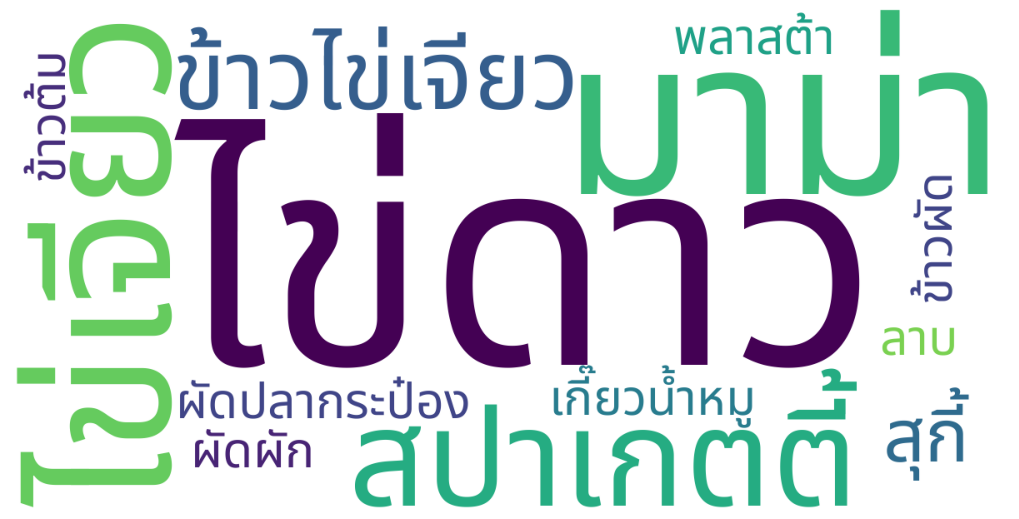

In [ ]:
text_data = all1.str.cat(sep=' ')

wordcloud = WordCloud(
    font_path='/content/static/NotoSansThai/NotoSansThai-Regular.ttf',
    regexp='[0-๙]+',

    stopwords = stopwords,
    width=1200, height=600,

    prefer_horizontal=.8,
    max_words=30,

    colormap='viridis',
    background_color = 'white').generate(text_data)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
help = df['อยากให้ทางมหาลัยมีการสนับสนุนใดๆ สำหรับผู้ที่ทำอาหารกินเองหรือไม่หรือไม่ '].dropna().str.split()
help = help.explode()
help.iloc[0] = ' '
help.iloc[2] = 'เพิ่มตู้เย็น'
help.iloc[3] = ' '
help.iloc[4] = 'เปลี่ยนภาชนะ/เครื่องครัว'
help.iloc[5] = ' '
help.iloc[7] = 'จัดตลาดสด'
help.iloc[8] = 'เพิ่มครัวกลาง'
help.iloc[10] = ' '
help.iloc[11] = 'เปลี่ยนภาชนะ/เครื่องครัว'
help.iloc[12] = ' '
help.iloc[13] = ' '
help.iloc[14] = ' '
help.iloc[15] = 'จัดตลาดสด'

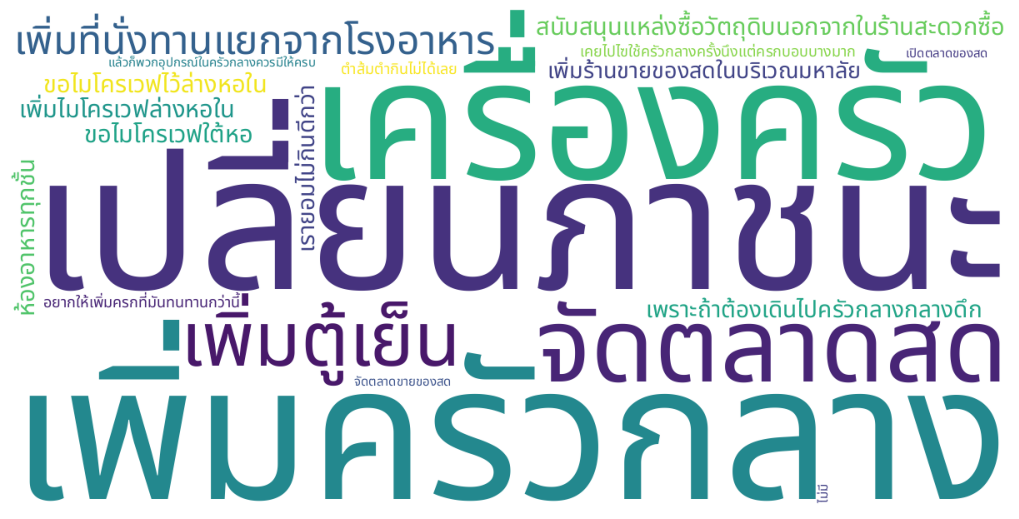

In [ ]:
text_data = help.str.cat(sep=' ')

wordcloud = WordCloud(
    font_path='/content/static/NotoSansThai/NotoSansThai-Regular.ttf',
    regexp='[0-๙]+',

    stopwords = stopwords,
    width=1200, height=600,

    prefer_horizontal=.8,
    max_words=30,

    colormap='viridis',
    background_color = 'white').generate(text_data)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
sefcook = df['ทำไมท่านถึงเลือกที่จะทำอาหารกินเอง'].dropna().str.split()
sefcook = sefcook.explode()
sefcook.iloc[0] = ' '
sefcook.iloc[4] = 'ประหยัด'
sefcook.iloc[5] = 'ประหยัด '
sefcook.iloc[10] = 'ประหยัด '
sefcook.iloc[12] = ' รสชาติอร่อย'
sefcook

0                                             
1                            ไม่รู้จะกินอะไรดี
2                       อยากกินเมนูที่ไม่มีขาย
15                                    อยู่บ้าน
15                                     ประหยัด
20                                    ประหยัด 
25                                     ประหยัด
25                          อยากกินแต่ไม่มีขาย
25                                   งานอดิเรก
26                                 ความประหยัด
35                                    ประหยัด 
39                        ได้ปริมาณมากกว่าซื้อ
44                                 รสชาติอร่อย
45                                     ประหยัด
46                                     ประหยัด
49                                     ประหยัด
58                                เงินเดือนหมด
58                          มีเงินซื้อแค่มาม่า
59    คิดถึงข้าวฝีมือที่บ้าน,หาร้านอร่อยไม่เจอ
60                           เพราะเงินเดือนหมด
60                          มีเงินซื้อแค่มาม่า
62           

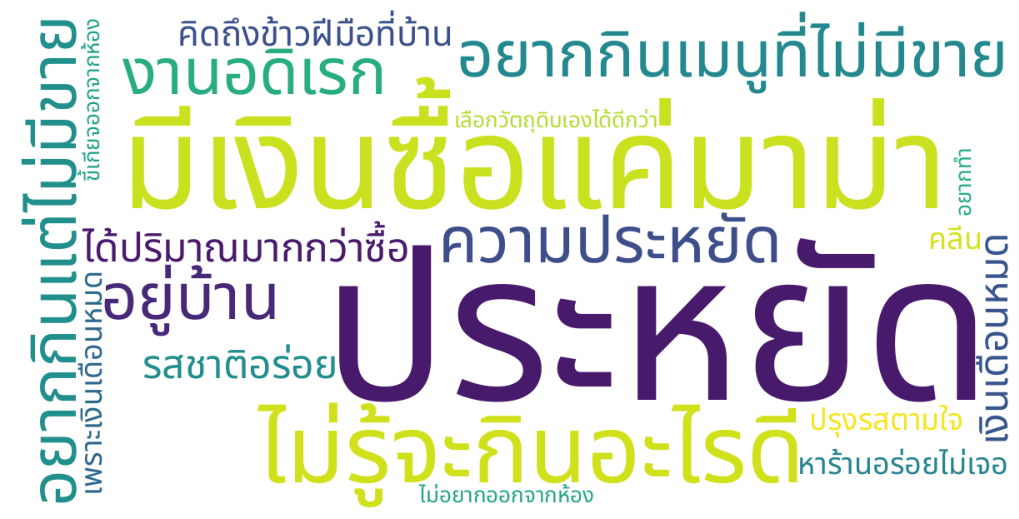

In [ ]:


text_data = sefcook.str.cat(sep=' ')

wordcloud = WordCloud(
    font_path='/content/static/NotoSansThai/NotoSansThai-Regular.ttf',
    regexp='[0-๙]+',

    stopwords = stopwords,
    width=1200, height=600,

    prefer_horizontal=.8,
    max_words=30,

    colormap='viridis',
    background_color = 'white').generate(text_data)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# ส่วนที่ 5

In [ ]:
sciData = df[df['ท่านกำลังศึกษาอยู่คณะใด'] == 'คณะวิทยาศาสตร์และเทคโนโลยี']

In [ ]:


# เลือกเฉพาะ 5 ปัจจัยแรก
top_factors_pcanteen = pcanteen_count.head()

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    x=top_factors_pcanteen.index,
    y=top_factors_pcanteen.values,
    text=top_factors_pcanteen.values,
    textposition='auto',
    marker_color='rgb(158,202,225)'  # สีของแท่ง
))

# ปรับแต่งเล็กน้อย
fig.update_layout(
    title="5 ปัจจัยที่ส่งผลมากที่สุดต่อการเลือกซื้ออาหารที่โรงอาหารมหาวิทยาลัย",
    xaxis_title="ปัจจัยที่ส่งผลต่อการเลือกซื้ออาหารที่โรงอาหารมหาวิทยาลัย",
    yaxis_title="จำนวนนักศึกษา",
    font_family="Noto Sans Thai",
    height=600, width=800
)

fig.show()

In [ ]:

poutside = outsidez['ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารที่ร้านอาหารนอกมหาวิทยาลัย'].str.split(',').explode().str.strip()
# นับจำนวนความถี่ของแต่ละปัจจัย
top_factors_poutside = poutside.value_counts().head()

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    x=top_factors_poutside.index,
    y=top_factors_poutside.values,
    text=top_factors_poutside.values,
    textposition='auto',
    marker_color='rgb(158,202,225)'  # สีของแท่ง
))

# ปรับแต่งเล็กน้อย
fig.update_layout(
    title="5 ปัจจัยที่ส่งผลมากที่สุดต่อการเลือกซื้ออาหารที่ร้านอาหารนอกมหาวิทยาลัย",
    xaxis_title="ปัจจัยที่ส่งผลต่อการเลือกซื้ออาหารที่ร้านอาหารนอกมหาวิทยาลัย",
    yaxis_title="จำนวนนักศึกษา",
    font_family="Noto Sans Thai",
    height=600, width=800
)

fig.show()



1                   รสชาติ
1      ความหลากหลายของเมนู
3                     ราคา
3                   รสชาติ
3              ปริมาณอาหาร
              ...         
98                  รสชาติ
98                 ระยะทาง
100                   ราคา
100                 รสชาติ
100                ระยะทาง
Name: ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารที่ร้านอาหารนอกมหาวิทยาลัย, Length: 243, dtype: object

In [ ]:

import plotly.graph_objects as go

# หาจำนวนของแต่ละค่าข้อมูล
value_counts = canteen["ท่านพักอยู่ที่ใด"].value_counts()

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    x=value_counts.index,
    y=value_counts.values,
    text=value_counts.values,
    textposition="outside",
))

# ปรับแต่งเล็กน้อย
fig.update_layout(
    title={
        'text': "จำนวนผู้ใช้งานโรงอาหารมหาวิทยาลัยเทียบกับที่พัก",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=600, width=600,
    xaxis=dict(title="ที่พัก"),
    yaxis=dict(title="จำนวนผู้ใช้งาน"),
)

fig.show()


In [ ]:
top_factors

ปัจจัยที่ท่านใช้ในการเลือกซื้ออาหารที่ร้านอาหารนอกมหาวิทยาลัย
ราคา                    45
 รสชาติ                 40
รสชาติ                  30
 ความหลากหลายของเมนู    28
 ปริมาณอาหาร            28
Name: count, dtype: int64

In [ ]:
import plotly.graph_objects as go

# หาจำนวนของแต่ละค่าข้อมูล
values_counts = outsidez["ท่านพักอยู่ที่ใด"].value_counts()

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    x=values_counts.index,
    y=values_counts.values,
    text=values_counts.values,
    textposition="outside",
))

# ปรับแต่งเล็กน้อย
fig.update_layout(
    title={
        'text': "จำนวนผู้ใช้งานร้านอาหารนอกมหาวิทยาลัยเทียบกับที่พัก",
        'x': 0.5
    },
    font_family="Noto Sans Thai",
    height=600, width=600,
    xaxis=dict(title="ที่พัก"),
    yaxis=dict(title="จำนวนผู้ใช้งาน"),
)

fig.show()


In [ ]:
# หาค่าเฉลี่ยของคอลัมน์ "ความพึงพอใจต่อโรงอาหาร Green canteen ในด้านต่างๆ"
green_canteen_avg_1 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [ด้านราคา]"].mean()
green_canteen_avg_2 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [ด้านคุณภาพอาหาร]"].mean()
green_canteen_avg_3 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [ด้านความหลากหลาย]"].mean()
green_canteen_avg_4 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [ความคุ้มค่า ]"].mean()
green_canteen_avg_5 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [ความสะอาด]"].mean()
green_canteen_avg_6 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [ทำเลที่ตั้ง (ความสะดวกในการเดินทาง)]"].mean()
green_canteen_avg_7 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [ความถี่ในการเข้าไปใช้บริการ]"].mean()
green_canteen_avg_8 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [ความสะดวกสะบาย (ที่เติมน้ำ ที่เก็บจาน ที่ล้างช้อน-ซ้อม ฯลฯ)]"].mean()
green_canteen_avg_9 = canteen["ความพึงพอใจต่อโรงอาหาร Green canteen  [บรรยากาศ (เสียง กลิ่น อุณหภูมิ ฯลฯ)]"].mean()

import plotly.graph_objects as go

# สร้าง DataFrame เก็บค่าเฉลี่ยของความพึงพอใจต่อโรงอาหาร Green canteen ในแต่ละด้าน
avg_satisfaction = pd.DataFrame({
    "ด้านราคา": green_canteen_avg_1,
    "คุณภาพอาหาร": green_canteen_avg_2,
    "ความหลากหลาย": green_canteen_avg_3,
    "ความคุ้มค่า": green_canteen_avg_4,
    "ความสะอาด": green_canteen_avg_5,
    "ทำเลที่ตั้ง": green_canteen_avg_6,
    "ความถี่ในการเข้าไปใช้บริการ": green_canteen_avg_7,
    "ความสะดวกสะบาย": green_canteen_avg_8,
    "บรรยากาศ": green_canteen_avg_9
}, index=["ค่าเฉลี่ย"])

# แปลง DataFrame เป็นรูปแบบที่เหมาะสมสำหรับการวาดกราฟ
avg_satisfaction = avg_satisfaction.transpose()

# เลือก 5 อันดับที่มีค่าเฉลี่ยสูงสุด
top_5_avg_satisfaction = avg_satisfaction.nlargest(5, "ค่าเฉลี่ย")

# ปัดเฉลี่ยลงมาเหลือเพียง 2 ตำแหน่งทศนิยม
top_5_avg_satisfaction["ค่าเฉลี่ย"] = top_5_avg_satisfaction["ค่าเฉลี่ย"].round(2)

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    y=top_5_avg_satisfaction.index,
    x=top_5_avg_satisfaction["ค่าเฉลี่ย"],
    text=top_5_avg_satisfaction["ค่าเฉลี่ย"],
    textposition="outside",
     orientation='h',
))

# ปรับแต่งเล็กน้อย
fig.update_layout(
    title="5 อันดับความพึงพอใจต่อโรงอาหาร Green canteen ในด้านต่างๆ",
    xaxis_title="ด้านความพึงพอใจ",
    yaxis_title="ค่าเฉลี่ย",
    font_family="Noto Sans Thai",
    height=600,
    width=800
)

fig.show()

In [ ]:
# หาค่าเฉลี่ยของคอลัมน์ "ความพึงพอใจต่อโรงอาหาร Green canteen ในด้านต่างๆ"
SC_canteen_avg_1 = canteen["ความพึงพอใจต่อโรงอาหาร SC [ด้านราคา]"].mean()
SC_canteen_avg_2 = canteen["ความพึงพอใจต่อโรงอาหาร SC [ด้านคุณภาพอาหาร]"].mean()
SC_canteen_avg_3 = canteen["ความพึงพอใจต่อโรงอาหาร SC [ด้านความหลากหลาย]"].mean()
SC_canteen_avg_4 = canteen["ความพึงพอใจต่อโรงอาหาร SC [ความคุ้มค่า ]"].mean()
SC_canteen_avg_5 = canteen["ความพึงพอใจต่อโรงอาหาร SC [ความสะอาด]"].mean()
SC_canteen_avg_6 = canteen["ความพึงพอใจต่อโรงอาหาร SC [ทำเลที่ตั้ง (ความสะดวกในการเดินทาง)]"].mean()
SC_canteen_avg_7 = canteen["ความพึงพอใจต่อโรงอาหาร SC [ความถี่ในการเข้าไปใช้บริการ]"].mean()
SC_canteen_avg_8 = canteen["ความพึงพอใจต่อโรงอาหาร SC [ความสะดวกสะบาย (ที่เติมน้ำ ที่เก็บจาน ที่ล้างช้อน-ซ้อม ฯลฯ)]"].mean()
SC_canteen_avg_9 = canteen["ความพึงพอใจต่อโรงอาหาร SC [บรรยากาศ (เสียง กลิ่น อุณหภูมิ ฯลฯ)]"].mean()

import plotly.graph_objects as go

# สร้าง DataFrame เก็บค่าเฉลี่ยของความพึงพอใจต่อโรงอาหาร Green canteen ในแต่ละด้าน
avg_satisfaction = pd.DataFrame({
    "ด้านราคา": SC_canteen_avg_1,
    "คุณภาพอาหาร": SC_canteen_avg_2,
    "ความหลากหลาย": SC_canteen_avg_3,
    "ความคุ้มค่า": SC_canteen_avg_4,
    "ความสะอาด": SC_canteen_avg_5,
    "ทำเลที่ตั้ง": SC_canteen_avg_6,
    "ความถี่ในการเข้าไปใช้บริการ": SC_canteen_avg_7,
    "ความสะดวกสะบาย": SC_canteen_avg_8,
    "บรรยากาศ": SC_canteen_avg_9
}, index=["ค่าเฉลี่ย"])

# แปลง DataFrame เป็นรูปแบบที่เหมาะสมสำหรับการวาดกราฟ
avg_satisfaction = avg_satisfaction.transpose()

# เลือก 5 อันดับที่มีค่าเฉลี่ยสูงสุด
top_5_avg_satisfaction = avg_satisfaction.nlargest(5, "ค่าเฉลี่ย")

# ปัดเฉลี่ยลงมาเหลือเพียง 2 ตำแหน่งทศนิยม
top_5_avg_satisfaction["ค่าเฉลี่ย"] = top_5_avg_satisfaction["ค่าเฉลี่ย"].round(2)

# สร้างกราฟแท่ง
fig = go.Figure(go.Bar(
    y=top_5_avg_satisfaction.index,
    x=top_5_avg_satisfaction["ค่าเฉลี่ย"],
    text=top_5_avg_satisfaction["ค่าเฉลี่ย"],
    textposition="outside",
    orientation='h',
))


fig.update_layout(
    title="5 อันดับความพึงพอใจต่อโรงอาหาร SC ในด้านต่างๆ",
    xaxis_title="ด้านความพึงพอใจ",
    yaxis_title="ค่าเฉลี่ย",
    font_family="Noto Sans Thai",
    height=600,
    width=800
)

fig.show()